In [1]:
from config import *
from util import *

In [2]:
logdir=logdir+'/10_13'

system='H4'
name=system
opt=''

runs=getruns(logdir)
runs=filter_paths(runs,'.*'+system+'.*'+opt+'.*')
runs=sortruns(runs)
ref=reference_energies[system]-.00004
printnotes(runs)

H4_kfac_0.005 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.01 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.02 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.05 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.1 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.2 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.005 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.01 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.02 (reloaded from /global/scratch/u

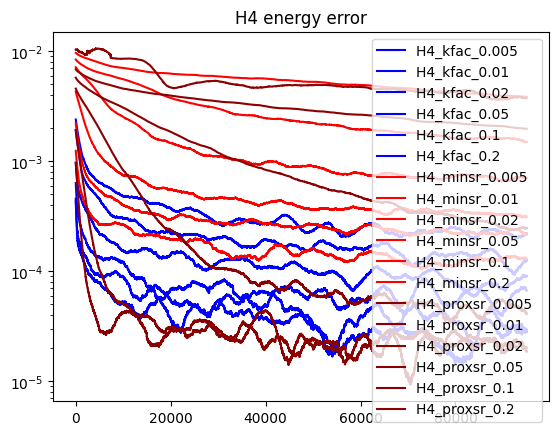

In [3]:
plotruns(logdir,runs,ref,2500,cleannote=lambda s:s.split('(')[0])
plt.title(name+' energy error')
plt.legend()
plt.yscale('log')
savefig(plotdir,"energy_train/"+name)